In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning & Preprocessing
# Load the dataset
try:
    df = pd.read_csv("netflix_titles.csv")
    print("Dataset loaded successfully.")

    # Handle missing values
    # Fill missing 'country' with 'Unknown'
    df['country'] = df['country'].fillna('Unknown')
    # Fill missing 'cast', 'director', 'date_added', 'rating' with a placeholder or use imputation if appropriate
    # For simplicity, we'll fill with 'Unknown' or a default value
    df['cast'] = df['cast'].fillna('Unknown')
    df['director'] = df['director'].fillna('Unknown')
    df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0]) # Fill with most frequent date
    df['rating'] = df['rating'].fillna(df['rating'].mode()[0]) # Fill with most frequent rating
    df['duration'] = df['duration'].fillna(df['duration'].mode()[0]) # Fill with most frequent duration

    # Convert 'date_added' to datetime objects
    df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

    # Drop rows where 'date_added' couldn't be parsed
    df.dropna(subset=['date_added'], inplace=True)

    print("\nMissing values after handling:")
    print(df.isnull().sum())

except FileNotFoundError:
    print("Error: netflix_titles.csv not found. Please upload the dataset file.")
    df = None

if df is not None:
    display(df.head())
    df.info()

Dataset loaded successfully.

Missing values after handling:
show_id         0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
type            0
dtype: int64


,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,Unknown,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,2019-11-30,2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,Unknown,2019-11-30,2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,2019-11-30,2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium",2019-11-29,2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,Unknown,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",2019-11-01,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       5837 non-null   int64         
 1   title         5837 non-null   object        
 2   director      5837 non-null   object        
 3   cast          5837 non-null   object        
 4   country       5837 non-null   object        
 5   date_added    5837 non-null   datetime64[ns]
 6   release_year  5837 non-null   int64         
 7   rating        5837 non-null   object        
 8   duration      5837 non-null   object        
 9   listed_in     5837 non-null   object        
 10  description   5837 non-null   object        
 11  type          5837 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 547.3+ KB


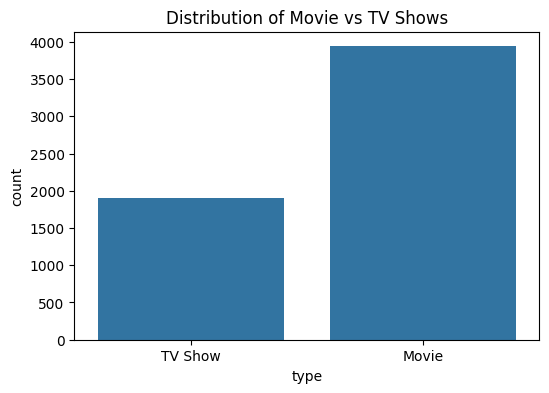

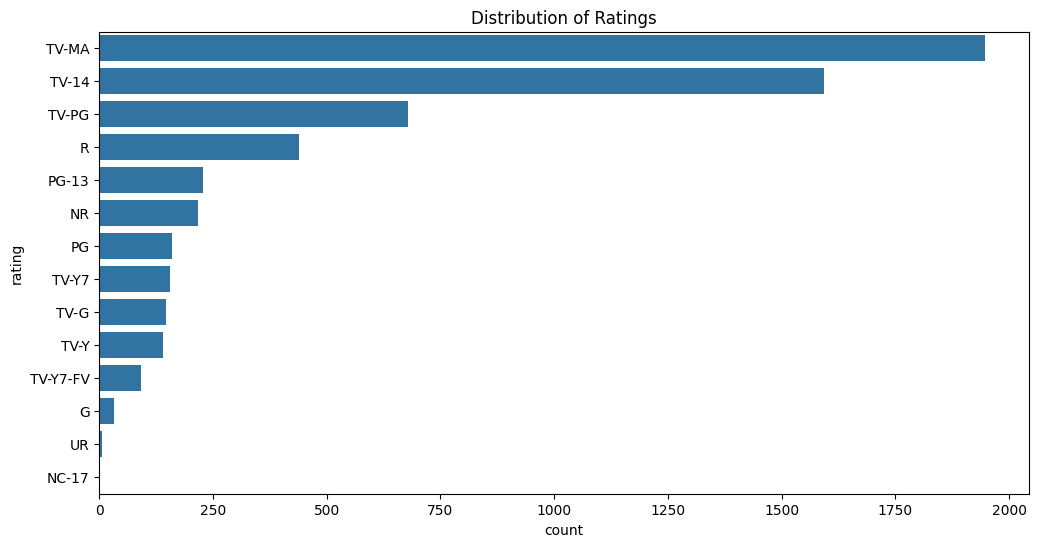

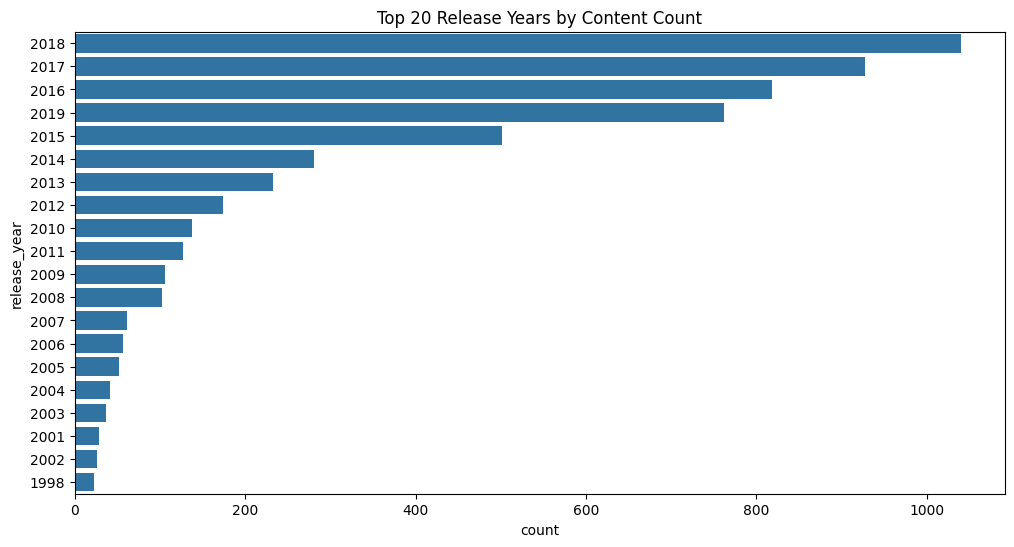

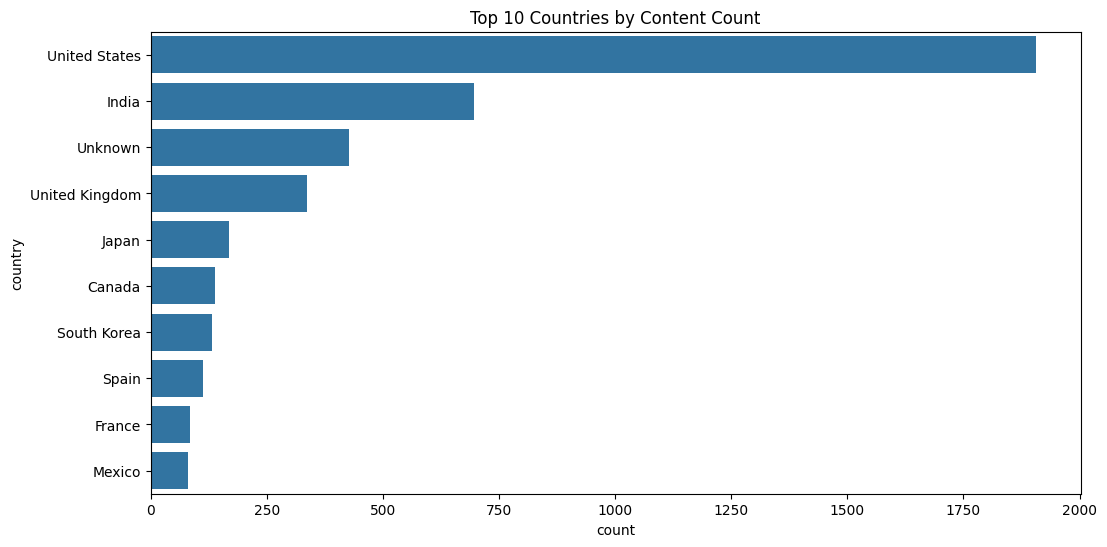


Top 20 Most Frequent Genres:
International Movies        1797
Dramas                      1488
Comedies                     992
International TV Shows       966
Documentaries                658
TV Dramas                    574
Action & Adventure           532
Independent Movies           516
TV Comedies                  425
Crime TV Shows               355
Thrillers                    353
Children & Family Movies     340
Romantic Movies              338
Kids' TV                     313
Stand-Up Comedy              273
Docuseries                   271
Romantic TV Shows            265
Music & Musicals             229
Horror Movies                229
British TV Shows             205
Name: count, dtype: int64


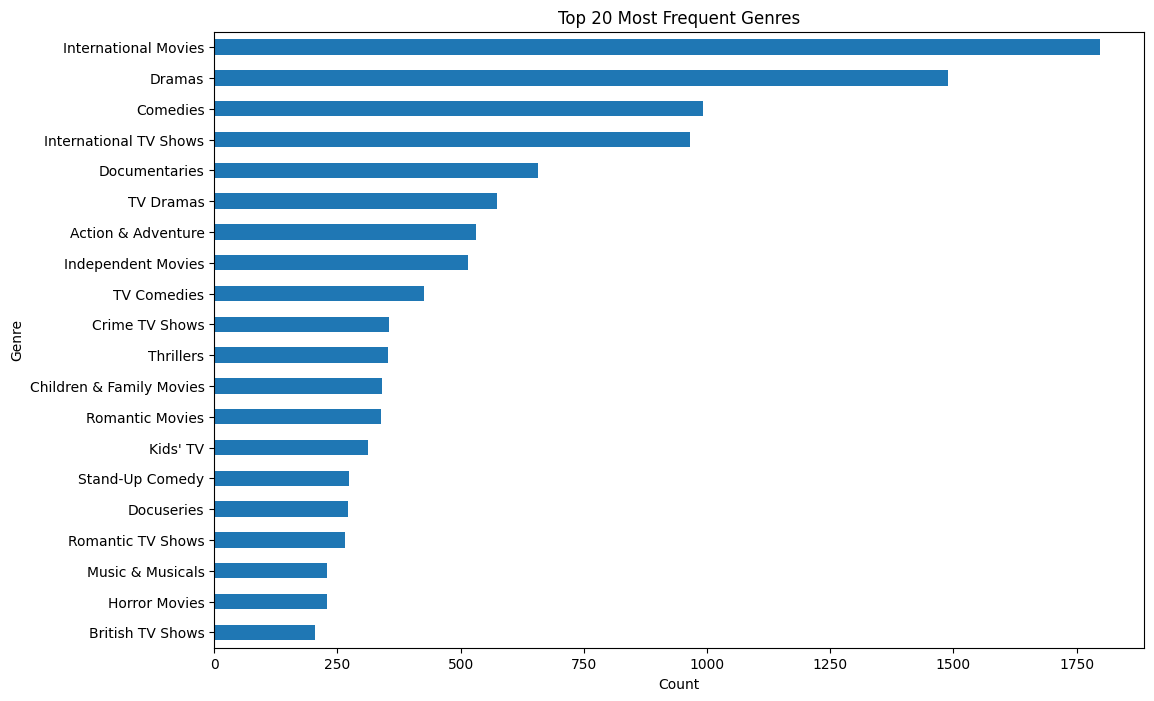

In [ ]:
# Exploratory Data Analysis (EDA)

if df is not None:
    # Distribution of Movie vs TV Shows
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x='type')
    plt.title('Distribution of Movie vs TV Shows')
    plt.show()

    # Distribution of Ratings
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index)
    plt.title('Distribution of Ratings')
    plt.show()

    # Top 20 Release Years by Content Count
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, y='release_year', order=df['release_year'].value_counts().index[:20])
    plt.title('Top 20 Release Years by Content Count')
    plt.show()

    # Top 10 Countries by Content Count
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, y='country', order=df['country'].value_counts().index[:10])
    plt.title('Top 10 Countries by Content Count')
    plt.show()

    # Analyze genres
    genres = df['listed_in'].str.split(', ').explode().tolist()
    genre_counts = pd.Series(genres).value_counts()

    print("\nTop 20 Most Frequent Genres:")
    print(genre_counts.head(20))

    # Visualize Top 20 Most Frequent Genres
    plt.figure(figsize=(12, 8))
    genre_counts.head(20).plot(kind='barh')
    plt.title('Top 20 Most Frequent Genres')
    plt.xlabel('Count')
    plt.ylabel('Genre')
    plt.gca().invert_yaxis()
    plt.show()

In [ ]:
# Feature Engineering

if df is not None:
    # Extract month and year from 'date_added'
    df['month_added'] = df['date_added'].dt.month
    df['year_added'] = df['date_added'].dt.year

    # Create a feature for the length of the description
    df['description_length'] = df['description'].str.len()

    # Display the dataframe with new features
    display(df[['date_added', 'month_added', 'year_added', 'description', 'description_length']].head())

,date_added,month_added,year_added,description,description_length
0,2019-11-30,11,2019,Brought together by meaningful meals in the pa...,141
1,2019-11-30,11,2019,"From Sierra de las Minas to Esquipulas, explor...",149
2,2019-11-30,11,2019,A goofy copywriter unwittingly convinces the I...,149
3,2019-11-29,11,2019,"Arranged to marry a rich man, young Ada is cru...",149
4,2019-11-01,11,2019,"Lovable pug Chip starts kindergarten, makes ne...",132


In [ ]:
# Clustering Algorithms (Example using genres and TF-IDF)

if df is not None:
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.cluster import KMeans

    # Fill NaN values in 'listed_in' with an empty string
    df['listed_in'] = df['listed_in'].fillna('')

    # Use TfidfVectorizer
    tfidf = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf.fit_transform(df['listed_in'])

    # Apply KMeans clustering
    n_clusters = 5 # Example number of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(tfidf_matrix)

    # Add cluster labels
    df['genre_cluster'] = kmeans.labels_

    print("\nNumber of items per genre cluster:")
    print(df['genre_cluster'].value_counts())

    display(df[['title', 'listed_in', 'genre_cluster']].head())

    # Note: Interpreting clusters requires examining the centroids or the content within each cluster.


Number of items per genre cluster:
genre_cluster
0    2224
1    1791
4     872
2     646
3     304
Name: count, dtype: int64


,title,listed_in,genre_cluster
0,Chocolate,"International TV Shows, Korean TV Shows, Roman...",1
1,Guatemala: Heart of the Mayan World,"Documentaries, International Movies",2
2,The Zoya Factor,"Comedies, Dramas, International Movies",0
3,Atlantics,"Dramas, Independent Movies, International Movies",0
4,Chip and Potato,Kids' TV,1


Generating Dashboard Visualizations:


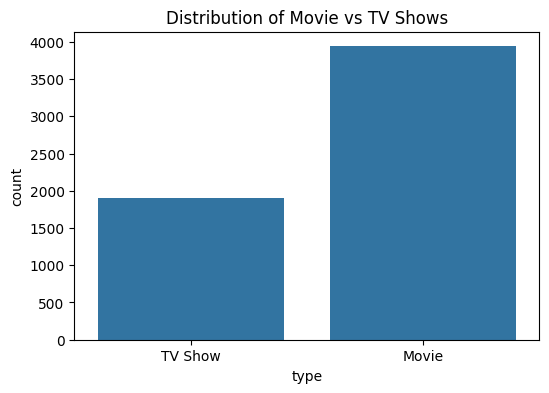

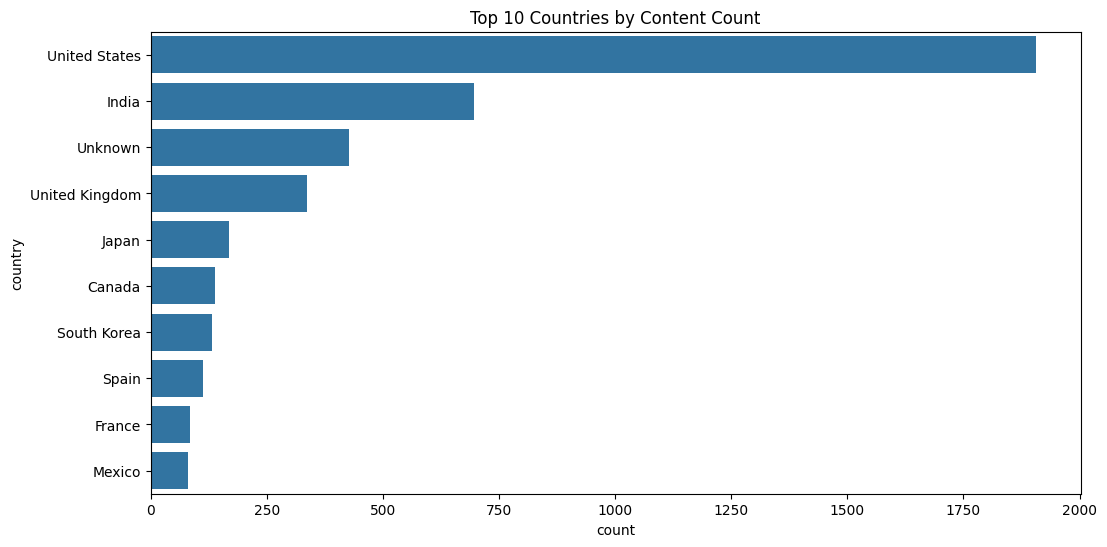

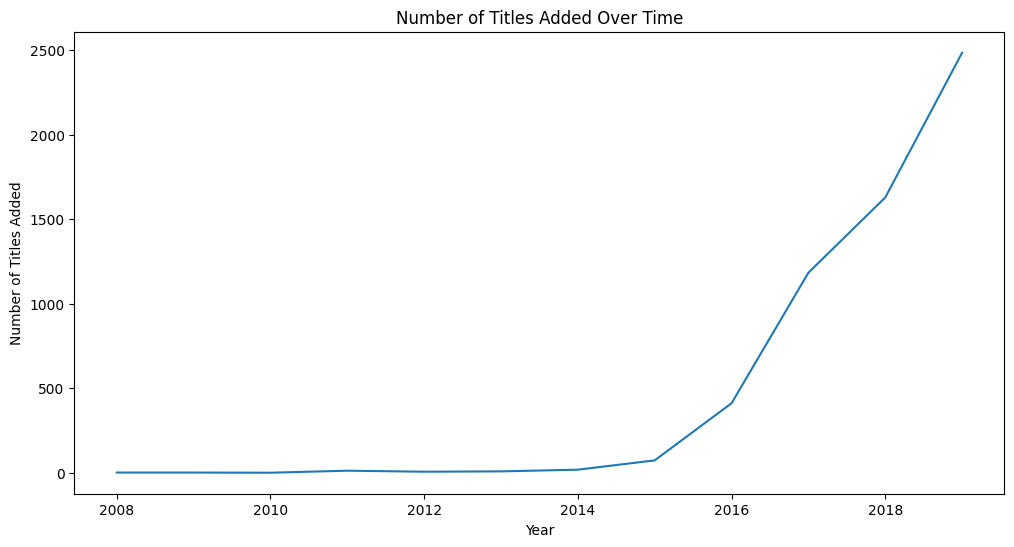

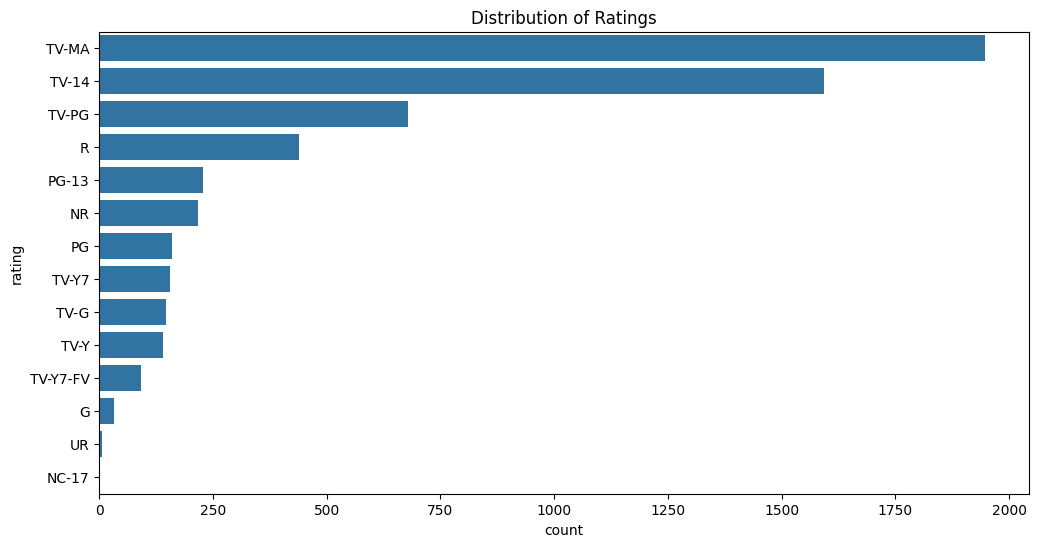

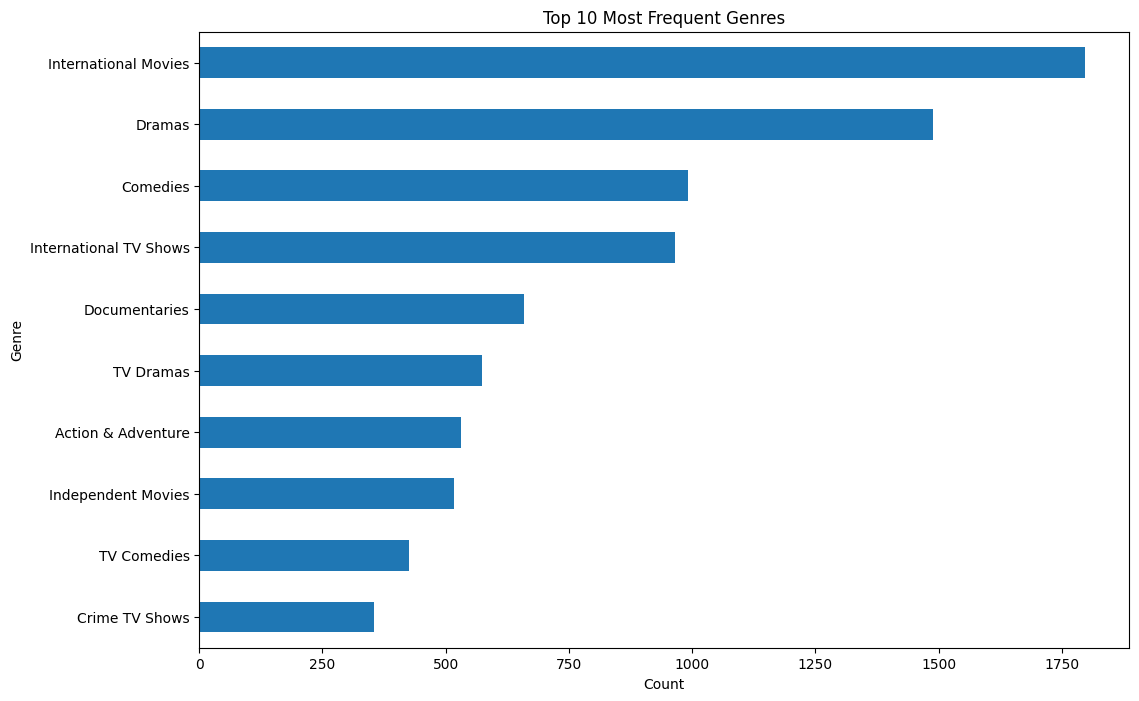

In [ ]:
# Dashboard & Visualization (Consolidated visualizations)

if df is not None:
    print("Generating Dashboard Visualizations:")

    # Distribution of Movie vs TV Shows
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x='type')
    plt.title('Distribution of Movie vs TV Shows')
    plt.show()

    # Top 10 Countries by Content Count
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, y='country', order=df['country'].value_counts().index[:10])
    plt.title('Top 10 Countries by Content Count')
    plt.show()

    # Number of titles added per year
    plt.figure(figsize=(12, 6))
    df['year_added'].value_counts().sort_index().plot(kind='line')
    plt.title('Number of Titles Added Over Time')
    plt.xlabel('Year')
    plt.ylabel('Number of Titles Added')
    plt.show()

    # Distribution of ratings
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index)
    plt.title('Distribution of Ratings')
    plt.show()

    # Top 10 Genres
    genres = df['listed_in'].str.split(', ').explode().tolist()
    genre_counts = pd.Series(genres).value_counts()
    plt.figure(figsize=(12, 8))
    genre_counts.head(10).plot(kind='barh')
    plt.title('Top 10 Most Frequent Genres')
    plt.xlabel('Count')
    plt.ylabel('Genre')
    plt.gca().invert_yaxis()
    plt.show()